# Regression modeling in R - a second pass

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

In [ ]:
library(ggplot2)

marketing = read.table(url("https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt"), sep = "")

data(marketing)
head(marketing)
n = dim(marketing)[1]; p = dim(marketing)[2] - 1

Note that, before an analysis, one should explore the data. We did this in "Regression modeling in R - a first pass".

## Linear regression modeling



### Sums of squares and $R^2$ for simple linear regression

First, let's fit the same model that we fit in the previous notebook (but to the entire dataset, rather than just a training set). In addition to running a summary of the model (using `summary()`), we'll also run an "analysis of variance", using the `anova()` function. The analysis of variance decomposes the total variability ($TSS$) into the explained variability ($ESS$), and the residual/unexplained variability ($RSS$). It also produces an "F-test" that we'll learn how to interpret in the next module.

In [ ]:
lm_marketing = lm(sales ~ facebook, data = marketing)
summary(lm_marketing)
anova(lm_marketing)

From the output, we see that:

- $ESS \approx 2,590.1$
- $RSS \approx 5,210.6$
- $TSS \approx 2,590.1 + 5,210.6 = 7,800.7$

#### Computing regression quantities "by hand"

Let's connect the `lm()` function output to the computations that we studied in a previous video. 

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

Note that you can extract these quantities from the `lm()` object:

In [ ]:
cat(paste("Explained sum of squares:", round(anova(lm_marketing)[[2]][1],2)),
    paste("Residual sum of squares:",round(anova(lm_marketing)[[2]][2],2)),
    paste("Total sum of squares:",round(anova(lm_marketing)[[2]][1] + anova(lm_marketing)[[2]][2],2)),
    paste("Coefficient of determination:",round(summary(lm_marketing)$r.squared,2)),
       sep = "\n")

## Multiple linear regression

Now, let's include the other predictors in our regression model.



In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

### Sums of squares and $R^2$ for multiple linear regression

Note that we can compute the sums of squares for multiple linear regression in the same was as for simple linear regression.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

## Non-identifiability: a simulation

Recall that a linear regression model will have non-identifiable parameters when the matrix $\left(X^TX\right)^{-1}$ does not exist, where $X$ is the design matrix. $\left(X^TX\right)^{-1}$ does not exist when the columns of $X$ are linearly dependent. 

Let's simulate such a situation. 

*An aside: simulations are an invaluable tool in statistics and data science. In a simulation, we construct a dataset ourselves, rather than collect it from the world. In doing so, we know how the data were generated. With the simulated data (sometimes called "synthetic data"), we can fit various models - models that are correct, and models that are incorrect - and study how those models perform on data with known relationships.*

Let's start out by simulating data in the following way. Let $Y_i = 2 + 3x_{i,1} + \varepsilon_i$,  where $\varepsilon_i \overset{iid}{\sim} N(0, 0.5^2)$,  $i = 1,...,n$, and $n = 75$. We'll generate the predictors, $x_i$ randomly from the interval $(0,1)$. This model will be identifiable.

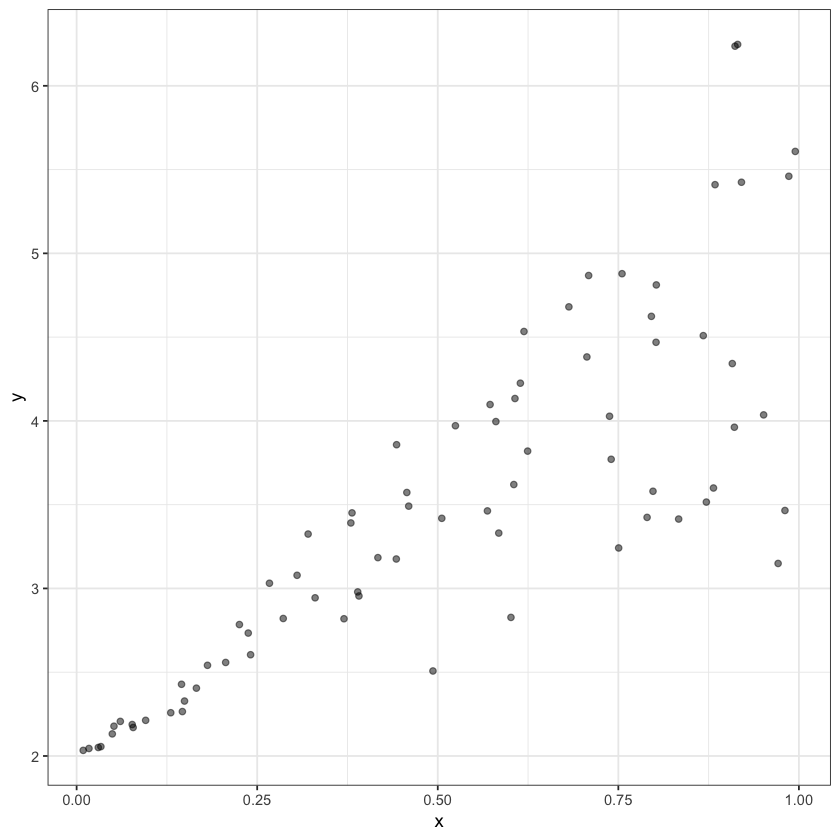

In [15]:
library(ggplot2)
set.seed(1901)
n = 75; beta0= 2; beta1 = 3; 
x = runif(n, 0, 1); 
sigma = x*0.75
e = rnorm(n,0,sigma); 
y= beta0 + beta1*x + e; 
df = data.frame(x, y); 

ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5) + theme_bw()

Now that we've simulated the data, let's fit a simple linear regression model to the data. We know that the model will be correct, because we know how the data were generated...we generated it!

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

So far, there is nothing alarming in the summary output, because we've fit the correct linear model. Now, let's add a second predictor, $x_{i,2}$, such that $x_{i,2} = 2x_{i,1}$, and $Y_i = 2 + 3x_{i,1} + 2x_{i,2} + \varepsilon_i$ (same assumptions on $\varepsilon_i$). This model should be non-identifiable, since two columns in the design matrix will be a constant multiple of each other.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

Notice that the row of the cofficients table corresponding to `x2` is populated with `NA`. That is because the coefficient cannot be estimated due to non-identifiability. 

The situation of "strict" non-identifiability is rare and easy to diagnose: if one column is a linear combination of others, it will show up in the coefficients table as `NA`. However, "near" non-identifiability, called *collinearity* or *multicollinearity*, is less rare, and a bit trickier to diagnose. Let's simulate some collinear data. We'll set $x_3 = \gamma x_1$, where $\gamma \overset{iid}{\sim}N(0,0.05^2)$. Then we'll fit the model $Y_i = \beta_0 + \beta_1x_{i,1} + \beta_2x_{i,3} + \varepsilon_i$.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE